In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from pathlib import Path
import os
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams
from IPython.display import Image, display
%matplotlib inline
from IPython.display import display, HTML
import seaborn as sns
sns.set(style="darkgrid")
import pylab as pl

rcParams['font.family'] = 'Retina'
rcParams['font.weight'] = 400

print(matplotlib.get_cachedir())
#print(rcParams.keys())

C:\Users\yliu4\.matplotlib


# Load Data
To use this notebook, you need to run [this](sql/WARS_activity.sql) query and save the results to ```var/activity.csv```.

In [4]:
# cache_filename = './var/activity-2019-10.csv'
# cache_filename = './var/activty.csv'
cache_filename = 'user_activity1.csv'
# data_file = Path(cache_filename)
ts = os.path.getmtime(cache_filename)
print('Updated on:{}'.format(datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M')))
# df = pd.read_csv(cache_filename, sep='\t')
df = pd.read_csv(cache_filename, sep=',')
df=df.loc[df['PROJECT_ACTIVITY_STATUS']!='Invite Queued']
df=df.iloc[:,1:]
df.head()

Updated on:2020-10-23 11:11


,ACTIVITY_YEAR_NUMBER,ACTIVITY_MONTH_NUMBER,ACTIVITY_WORK_DAYS_IN_MONTH,ACTIVITY_WEEK_NUMBER,ACTIVITY_HOUR_NUMBER,ACTIVITY_IS_WORK_DAY,CREATED_DATE,PL_NAME,PL_REGION,PL_NAME2,...,SOURCE_APPLICATION,PROJECT_ACTIVITY_STATUS_ID,PROJECT_ACTIVITY_STATUS,PROJECT_YEAR_NUMBER,PROJET_MONTH_NUMBER,PROJECT_WORK_DAYS_IN_MONTH,PROJECT_WEEK_NUMBER,PROJECT_HOUR_NUMBER,PROJECT_IS_WORK_DAY,CREATE_DATE
0,2020,9,22,36,0,0,Sep 6 2020 12:00AM,Americas PSF,Americas,Americas,...,CMP_ACCEPT,4,Accepted,2020,9,22,36,21,1,Sep 2 2020 9:37PM
1,2020,9,22,36,0,0,Sep 6 2020 12:01AM,EMEA PSF,EMEA,EMEA,...,CMP_ACCEPT,40,Accept Started,2020,9,22,36,16,1,Sep 4 2020 4:10PM
2,2020,9,22,36,0,0,Sep 6 2020 12:03AM,Americas PSF,Americas,Americas,...,CMP_ACCEPT,4,Accepted,2020,9,22,36,16,1,Sep 4 2020 4:10PM
3,2020,9,22,36,0,0,Sep 6 2020 12:04AM,Americas Private,Americas,Americas,...,CMP_ACCEPT,40,Accept Started,2020,9,22,36,22,1,Sep 3 2020 10:18PM
4,2020,9,22,36,0,0,Sep 6 2020 12:05AM,Americas Public,Americas,Americas,...,CMP_ACCEPT,4,Accepted,2020,9,22,36,21,1,Sep 3 2020 9:59PM


In [3]:
df.PL_REGION.unique()

array(['Americas', 'EMEA', 'APAC'], dtype=object)

In [4]:
df.PL_NAME2.unique()

array(['Americas', 'EMEA', 'APAC ex-China', 'Greater China'], dtype=object)

In [5]:
df.PROJECT_ACTIVITY_STATUS.unique()

array(['Accepted', 'Accept Started', 'Invited', 'Highlights Added',
       'Given to Client', 'Scheduled'], dtype=object)

In [5]:
df_datetime = pd.to_datetime(df['CREATED_DATE'], errors='coerce')
df['DAY_OF_YEAR'] = df_datetime.dt.dayofyear
df['DAY_OF_WEEK'] = df_datetime.dt.dayofweek
df.head()

,ACTIVITY_YEAR_NUMBER,ACTIVITY_MONTH_NUMBER,ACTIVITY_WORK_DAYS_IN_MONTH,ACTIVITY_WEEK_NUMBER,ACTIVITY_HOUR_NUMBER,ACTIVITY_IS_WORK_DAY,CREATED_DATE,PL_NAME,PL_REGION,PL_NAME2,...,PROJECT_ACTIVITY_STATUS,PROJECT_YEAR_NUMBER,PROJET_MONTH_NUMBER,PROJECT_WORK_DAYS_IN_MONTH,PROJECT_WEEK_NUMBER,PROJECT_HOUR_NUMBER,PROJECT_IS_WORK_DAY,CREATE_DATE,DAY_OF_YEAR,DAY_OF_WEEK
0,2020,9,22,36,0,0,Sep 6 2020 12:00AM,Americas PSF,Americas,Americas,...,Accepted,2020,9,22,36,21,1,Sep 2 2020 9:37PM,250,6
1,2020,9,22,36,0,0,Sep 6 2020 12:01AM,EMEA PSF,EMEA,EMEA,...,Accept Started,2020,9,22,36,16,1,Sep 4 2020 4:10PM,250,6
2,2020,9,22,36,0,0,Sep 6 2020 12:03AM,Americas PSF,Americas,Americas,...,Accepted,2020,9,22,36,16,1,Sep 4 2020 4:10PM,250,6
3,2020,9,22,36,0,0,Sep 6 2020 12:04AM,Americas Private,Americas,Americas,...,Accept Started,2020,9,22,36,22,1,Sep 3 2020 10:18PM,250,6
4,2020,9,22,36,0,0,Sep 6 2020 12:05AM,Americas Public,Americas,Americas,...,Accepted,2020,9,22,36,21,1,Sep 3 2020 9:59PM,250,6


# Shape Data

In [6]:
def shape(df):
    # working set
    df_population = df

    # date filters
    df_population = df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
    df_population = df_population.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]    

    # status filters
    df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted', 'Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]

    df_grouped = df_population.loc[~df_population.CREATED_BY.isin([0, 9999])].groupby(['PL_NAME2', 'DAY_OF_YEAR', 'PROJECT_ACTIVITY_STATUS'])
 
    df_working = pd.DataFrame(df_grouped['CREATED_BY'].nunique().to_frame())
    df_working['TOTAL'] = df_grouped['PROJECT_ACTIVITY_STATUS'].count().to_frame()['PROJECT_ACTIVITY_STATUS']
    df_working = pd.DataFrame(df_working.to_records())
    df_working.columns = ['PL_NAME2', 'DAY_OF_YEAR', 'PROJECT_ACTIVITY_STATUS', 'UNIQUE_USERS', 'ACTIVITY_COUNT']
    df_working['ACTIVITY_PER_USER'] = df_working['ACTIVITY_COUNT'] / df_working['UNIQUE_USERS']
    df_working.head()
    return df_working

df_working = shape(df)
df_working.head()


,PL_NAME2,DAY_OF_YEAR,PROJECT_ACTIVITY_STATUS,UNIQUE_USERS,ACTIVITY_COUNT,ACTIVITY_PER_USER
0,APAC ex-China,245,Accept Started,35,57,1.628571
1,APAC ex-China,245,Accepted,41,59,1.439024
2,APAC ex-China,245,Given to Client,68,192,2.823529
3,APAC ex-China,245,Highlights Added,98,598,6.102041
4,APAC ex-China,245,Invited,104,337,3.240385


# Render Data

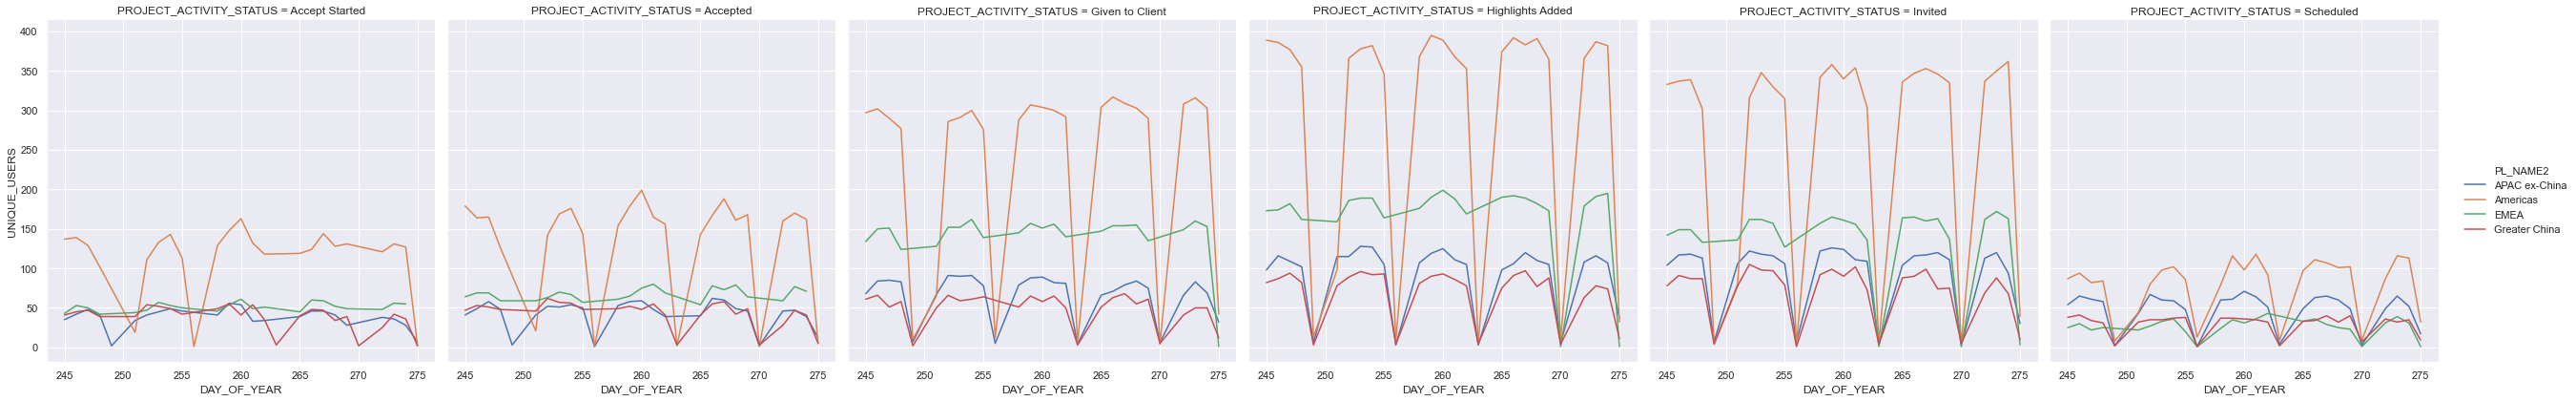

In [7]:
def render(df, title=""):
    sns.set(style="darkgrid")
    
    ax = sns.relplot(x="DAY_OF_YEAR", y="UNIQUE_USERS",
                     col="PROJECT_ACTIVITY_STATUS",
                     hue="PL_NAME2",
                     height=6, aspect=1, facet_kws=dict(sharex=False),
                     kind="line", legend="full", data=df)

render(df_working)

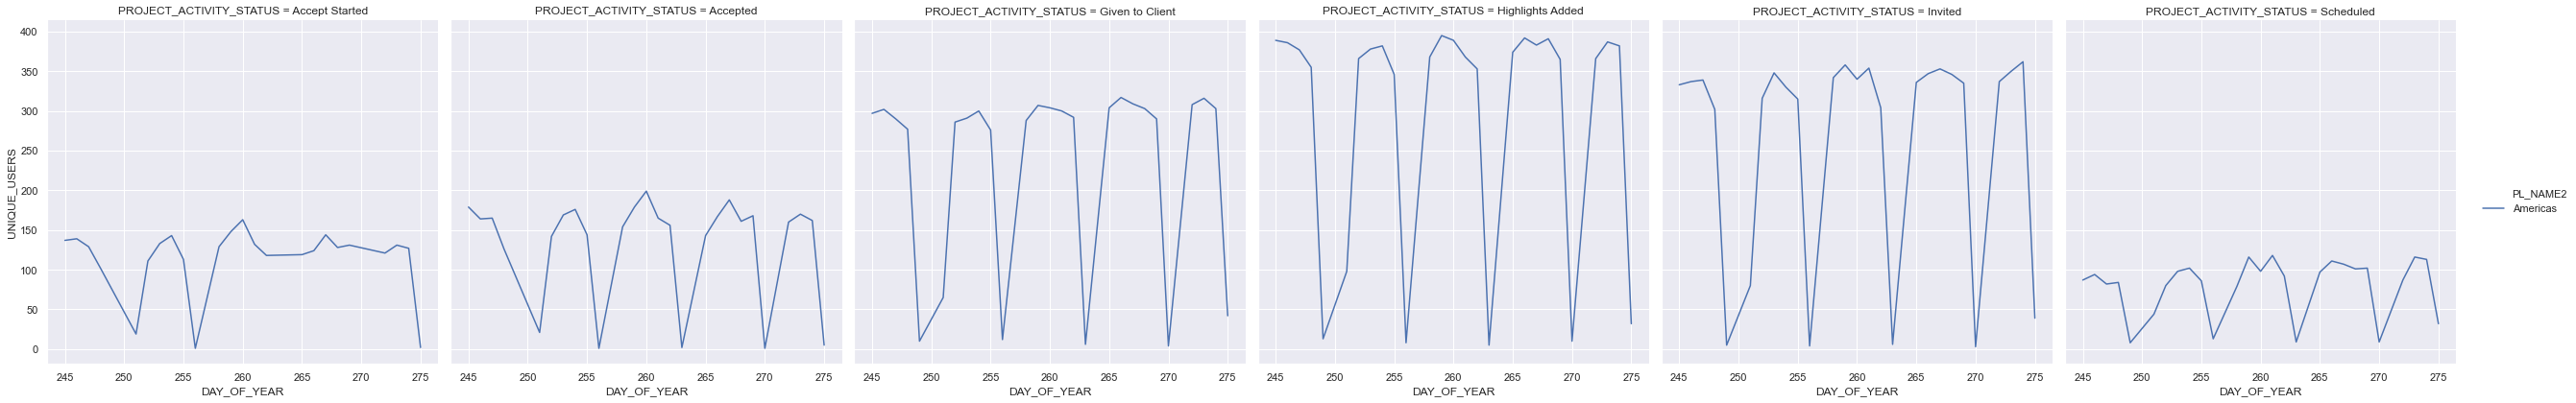

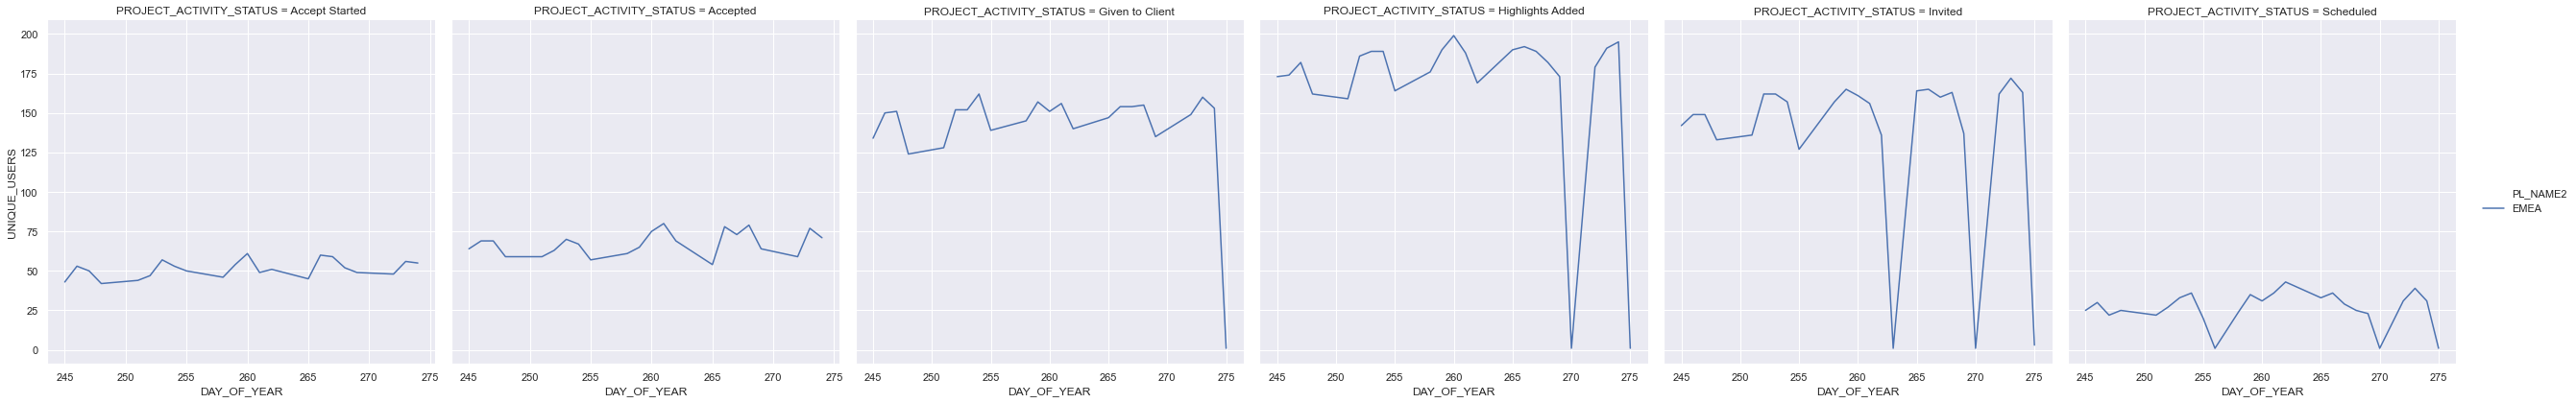

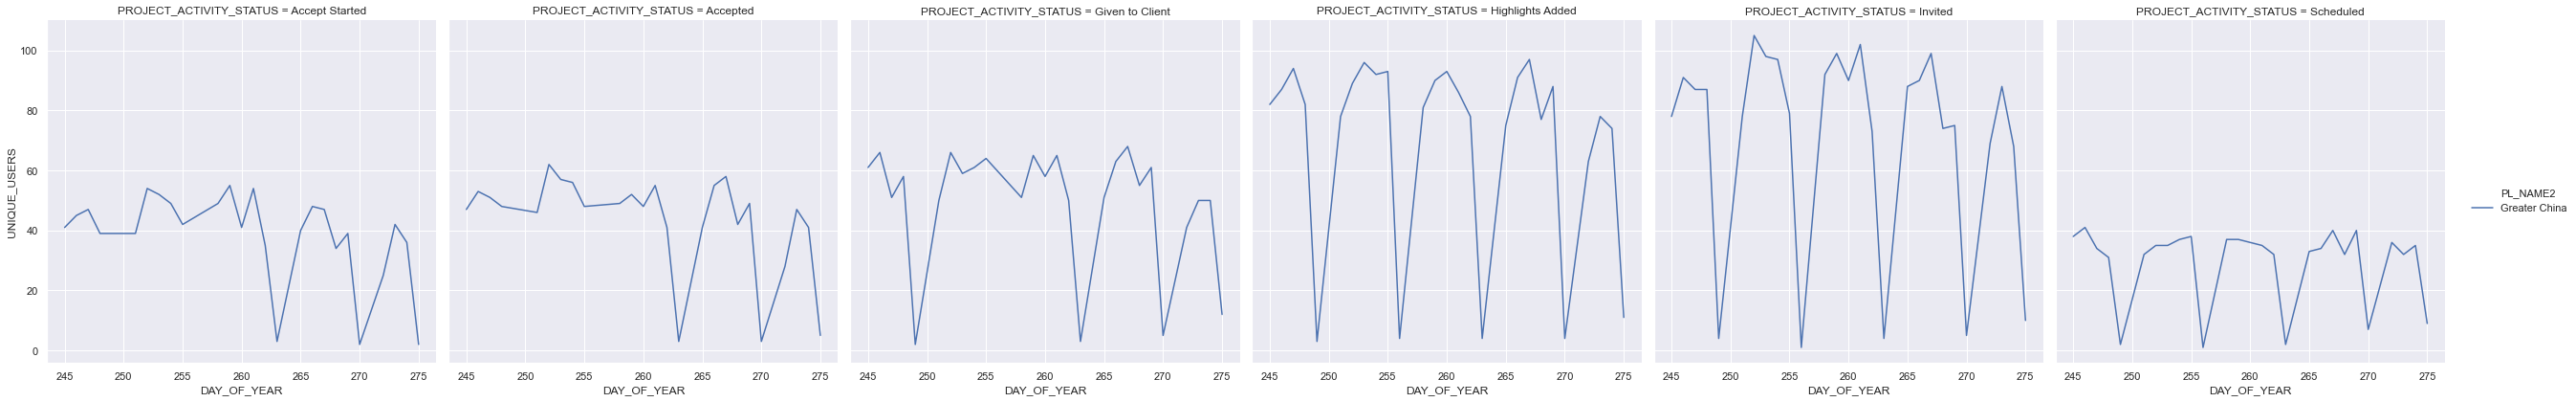

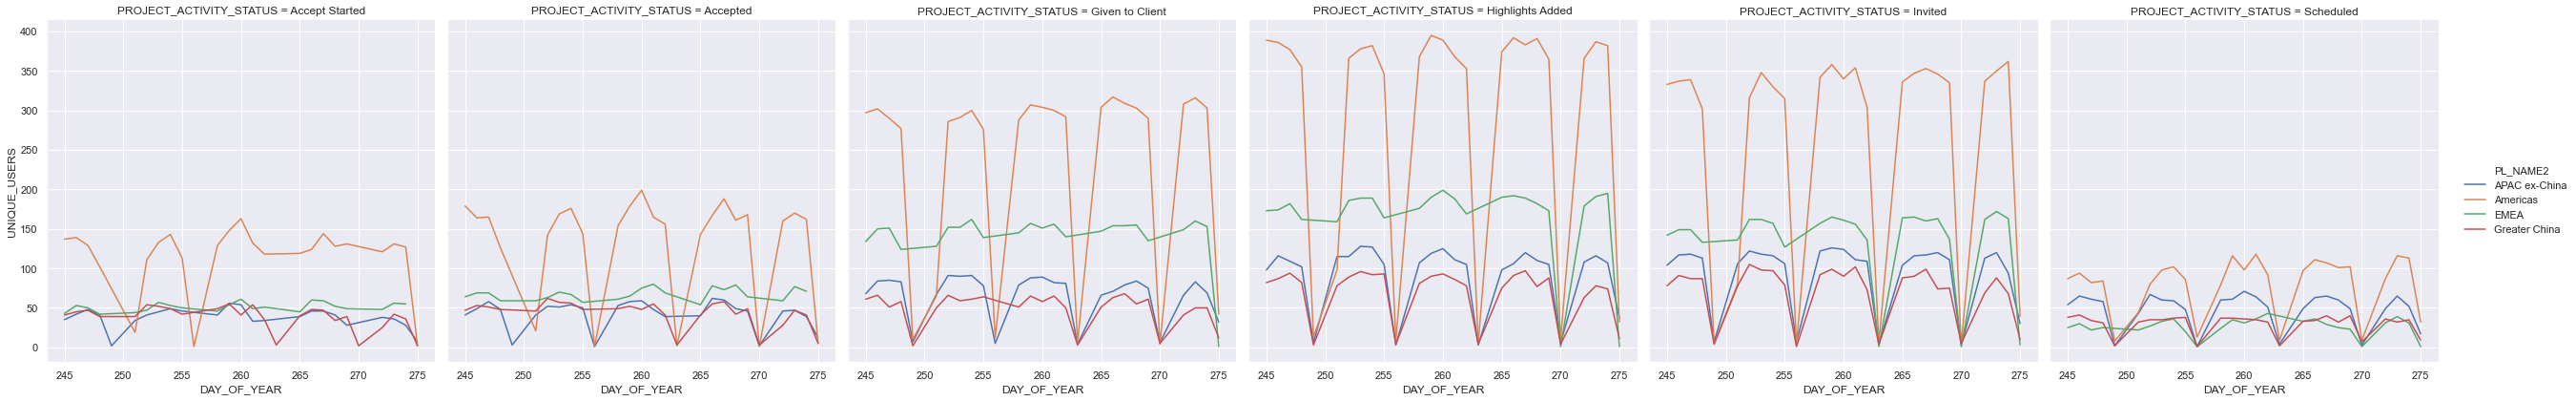

In [8]:
render(shape(df.loc[df.PL_NAME2 == 'Americas']))
render(shape(df.loc[df.PL_NAME2 == 'EMEA']))
render(shape(df.loc[df.PL_NAME2 == 'Greater China']))
render(shape(df))

# Total Global Activity Users

In [9]:
df_population = df

# region filters
#df_population = df_population.loc[df_population.PL_NAME2 == 'Americas']
# df_population = df_population.loc[df_population.REVREC_REGION == 'EMEA']
# df_population = df_population.loc[df_population.REVREC_BU == 'PSF']


# activity filters
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted', 'Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]
#df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Invite Queued'])]

# date filters
df_population = df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
df_population = df_population.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]

# robot filters
df_population = df_population.loc[~df_population.CREATED_BY.isin([0, 9999])]

# grouped
df_grouped = df_population.groupby(['PL_NAME2','DAY_OF_YEAR'])
df_working = pd.DataFrame(df_grouped['CREATED_BY'].nunique().to_frame())
df_working = pd.DataFrame(df_working.to_records())
print(df_working)
df_working['CREATED_BY_ROLLING'] = df_working['CREATED_BY'].rolling(7).mean()
df_working.tail()

          PL_NAME2  DAY_OF_YEAR  CREATED_BY
0    APAC ex-China          245         142
1    APAC ex-China          246         145
2    APAC ex-China          247         147
3    APAC ex-China          248         147
4    APAC ex-China          249          11
..             ...          ...         ...
102  Greater China          270          10
103  Greater China          272          97
104  Greater China          273         115
105  Greater China          274         101
106  Greater China          275          21

[107 rows x 3 columns]


,PL_NAME2,DAY_OF_YEAR,CREATED_BY,CREATED_BY_ROLLING
102,Greater China,270,10,87.857143
103,Greater China,272,97,101.000000
104,Greater China,273,115,101.714286
105,Greater China,274,101,97.857143
106,Greater China,275,21,82.142857


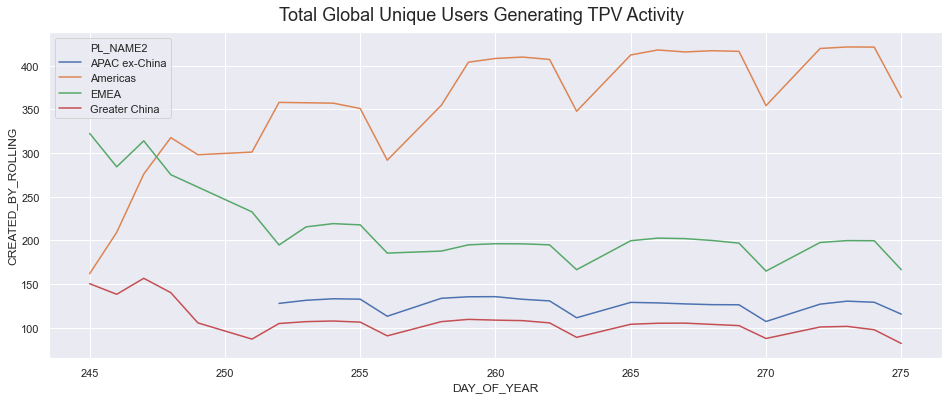

In [10]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(16, 6))
f.suptitle('Total Global Unique Users Generating TPV Activity', fontsize="18", y=0.94)
ax = sns.lineplot(x="DAY_OF_YEAR", y="CREATED_BY_ROLLING", hue="PL_NAME2",data=df_working)

# User Activity at Time of Day

In [11]:
df_population = df.copy()

# df_population = df_population.loc[df_population.CREATED_BY.isin([6361, 6360])]
# df_population = df_population.loc[df_population.CREATED_BY.isin([5374])]

# revrec filters
df_population = df_population.loc[df_population.PL_NAME2 == 'Americas']
# df_population = df_population.loc[df_population.REVREC_BU == 'NAFS']
# df_population = df_population.loc[df_population.REVREC_BU == 'Corporate']
# df_population = df_population.loc[df_population.REVREC_BU == 'PSF']

# df_population = df_population.loc[df_population.REVREC_REGION == 'EMEA']
# df_population = df_population.loc[df_population.REVREC_REGION == 'ASIA']

# P&L filters
# df_population = df_population.loc[df_population.PL_NAME == 'Americas Private']
# df_population = df_population.loc[df_population.PL_NAME == 'Americas Public']
# df_population = df_population.loc[df_population.PL_NAME == 'Americas PSF']
# df_population = df_population.loc[df_population.PL_NAME == 'Americas Corporate']
# df_population = df_population.loc[df_population.PL_NAME == 'Americas Credit']

# df_population = df_population.loc[df_population.PL_NAME == 'Greater China'] 

# activity filters
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted', 'Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Invited', 'Invite Queued'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Highlights Added'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Added to List'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Given to Client'])]

df_population.tail()

,ACTIVITY_YEAR_NUMBER,ACTIVITY_MONTH_NUMBER,ACTIVITY_WORK_DAYS_IN_MONTH,ACTIVITY_WEEK_NUMBER,ACTIVITY_HOUR_NUMBER,ACTIVITY_IS_WORK_DAY,CREATED_DATE,PL_NAME,PL_REGION,PL_NAME2,...,PROJECT_ACTIVITY_STATUS,PROJECT_YEAR_NUMBER,PROJET_MONTH_NUMBER,PROJECT_WORK_DAYS_IN_MONTH,PROJECT_WEEK_NUMBER,PROJECT_HOUR_NUMBER,PROJECT_IS_WORK_DAY,CREATE_DATE,DAY_OF_YEAR,DAY_OF_WEEK
1126392,2020,9,22,40,23,1,Sep 30 2020 11:59PM,Americas Private,Americas,Americas,...,Accept Started,2020,9,22,40,16,1,Sep 30 2020 4:12PM,274,2
1126393,2020,9,22,40,23,1,Sep 30 2020 11:59PM,Americas Private,Americas,Americas,...,Scheduled,2020,9,22,40,14,1,Sep 30 2020 2:04PM,274,2
1126395,2020,9,22,40,23,1,Sep 30 2020 11:59PM,Americas PSF,Americas,Americas,...,Accepted,2020,9,22,38,17,1,Sep 18 2020 5:43PM,274,2
1126396,2020,9,22,40,23,1,Sep 30 2020 11:59PM,Americas Public,Americas,Americas,...,Accepted,2020,9,22,39,17,1,Sep 21 2020 5:16PM,274,2
1126398,2020,9,22,40,23,1,Sep 30 2020 11:59PM,Americas Public,Americas,Americas,...,Highlights Added,2020,9,22,40,14,1,Sep 30 2020 2:22PM,274,2


In [12]:
def shape_hourly_box(df):
    # robot filters
    df_working = df.loc[~df_population.CREATED_BY.isin([0, 9999])]
    df_working = df_working.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]    

    # grouped
    df_grouped = df_working.groupby(['ACTIVITY_YEAR_NUMBER', 'DAY_OF_YEAR', 'ACTIVITY_HOUR_NUMBER','PL_NAME2'])
    df_working = pd.DataFrame(df_grouped['CREATED_BY'].nunique().to_frame())
    df_working['ACTIVITY_COUNT'] = df_grouped['ACTIVITY_HOUR_NUMBER'].count().to_frame()['ACTIVITY_HOUR_NUMBER']
    df_working = pd.DataFrame(df_working.to_records())
    df_working['ACTIVITY_PER_USER'] = df_working['ACTIVITY_COUNT'] / df_working['CREATED_BY']
    return df_working

# date filters
df_working = df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
# df_working = df_working.loc[df_working.ACTIVITY_MONTH_NUMBER.isin([9])]
df_working = df_working.loc[df_working.ACTIVITY_MONTH_NUMBER == 9]
df_working = shape_hourly_box(df_working)
df_working.tail()

,ACTIVITY_YEAR_NUMBER,DAY_OF_YEAR,ACTIVITY_HOUR_NUMBER,PL_NAME2,CREATED_BY,ACTIVITY_COUNT,ACTIVITY_PER_USER
522,2020,274,23,Americas,91,267,2.934066
523,2020,275,0,Americas,47,143,3.042553
524,2020,275,1,Americas,28,94,3.357143
525,2020,275,2,Americas,29,73,2.517241
526,2020,275,3,Americas,14,31,2.214286


In [13]:
def offset_hours(df, utc_offset):
    # Adjust offset to CST
    df_adjusted = df.copy()
    df_adjusted['ACTIVITY_HOUR_NUMBER'] = df_adjusted['ACTIVITY_HOUR_NUMBER'] + utc_offset
    df_adjusted.loc[df_adjusted['ACTIVITY_HOUR_NUMBER'] < 0, 'ACTIVITY_HOUR_NUMBER'] = df_adjusted['ACTIVITY_HOUR_NUMBER'] + 24
    df_adjusted.loc[df_adjusted['ACTIVITY_HOUR_NUMBER'] > 23, 'ACTIVITY_HOUR_NUMBER'] = df_adjusted['ACTIVITY_HOUR_NUMBER'] - 24
    df_adjusted['ACTIVITY_HOUR_NUMBER'].unique()
    return df_adjusted

df_adjusted = offset_hours(df_working, -6)
# df_adjusted = offset_hours(df_working, 7)
df_adjusted['ACTIVITY_HOUR_NUMBER'].unique()

array([22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21])

In [14]:
def render_hourly_box(df, field, title, offset=0, ylabel=''):    
    # set up plot options
    color_black_primary = (0.0, 0.0, 0.0, 0.87)
    color_black_secondary = (0.0, 0.0, 0.0, 0.7)
    
    f, ax = plt.subplots(figsize=(22, 9))
    f.suptitle(title, 
               fontsize="24", 
               y=0.94,
               color=color_black_primary)

    # plot it!
    ax_1 = sns.boxplot(x="ACTIVITY_HOUR_NUMBER", 
                       y=field,
                       width=.9,
                       linewidth=1.3,
                       fliersize=1.75,
                       ax=ax,
                       palette=sns.cubehelix_palette(7),
               data=df)

    # set xlabel
    if (offset == 0):
        ax_1.set(xlabel='Hour of Day (UTC±00:00)')
    if (offset > 0):
        ax_1.set(xlabel='Hour of Day (UTC+{:02}:00)'.format(offset)) 
    if (offset < 0):
        ax_1.set(xlabel='Hour of Day (UTC-{:02}:00)'.format(abs(offset))) 
        
    # set ylabel
    if (ylabel != ''):
        ax_1.set(ylabel=ylabel)  
        
    # clean up x and y axis
    ax_1.xaxis.set_label_coords(0.5, -0.1) 
    ax_1.yaxis.set_label_coords(-0.044, 0.5)
    ax_1.xaxis.label.set_color(color_black_primary) 
    ax_1.yaxis.label.set_color(color_black_primary)
    ax_1.tick_params(colors=color_black_primary)


#render_hourly_box(df_adjusted, "CREATED_BY", "Employees Generating TPV Activity (Invites, Phone Accepts, Highlights, GTC)", offset=-6, ylabel='Active Employees')

# Houry TPV Activities for Americas

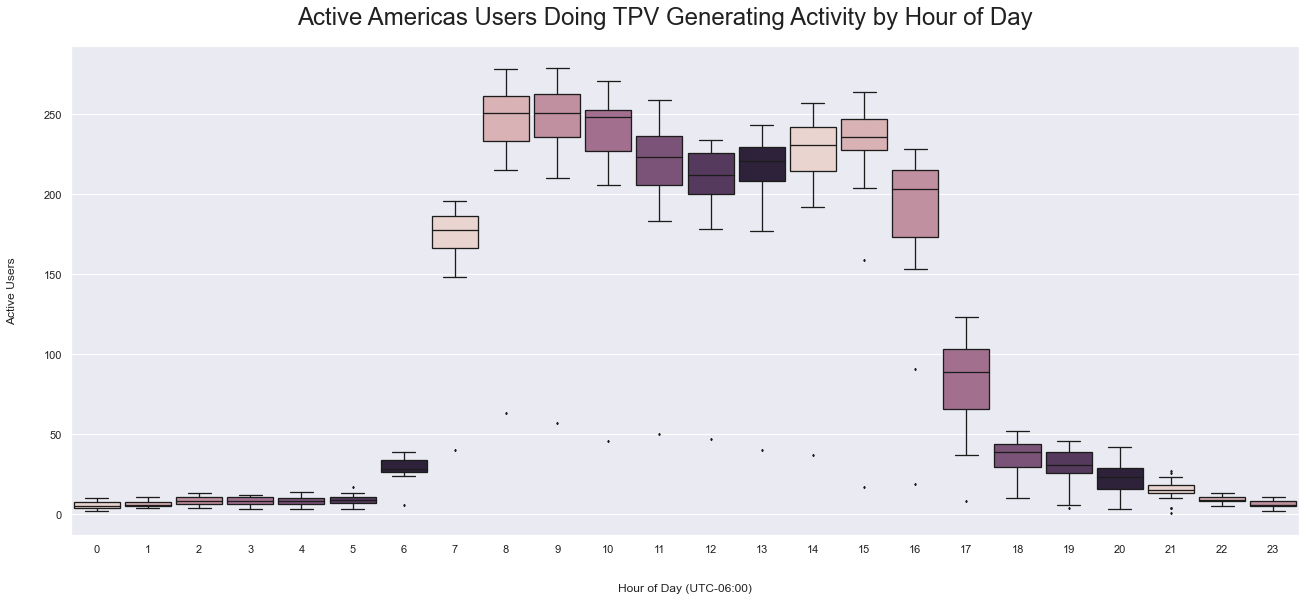

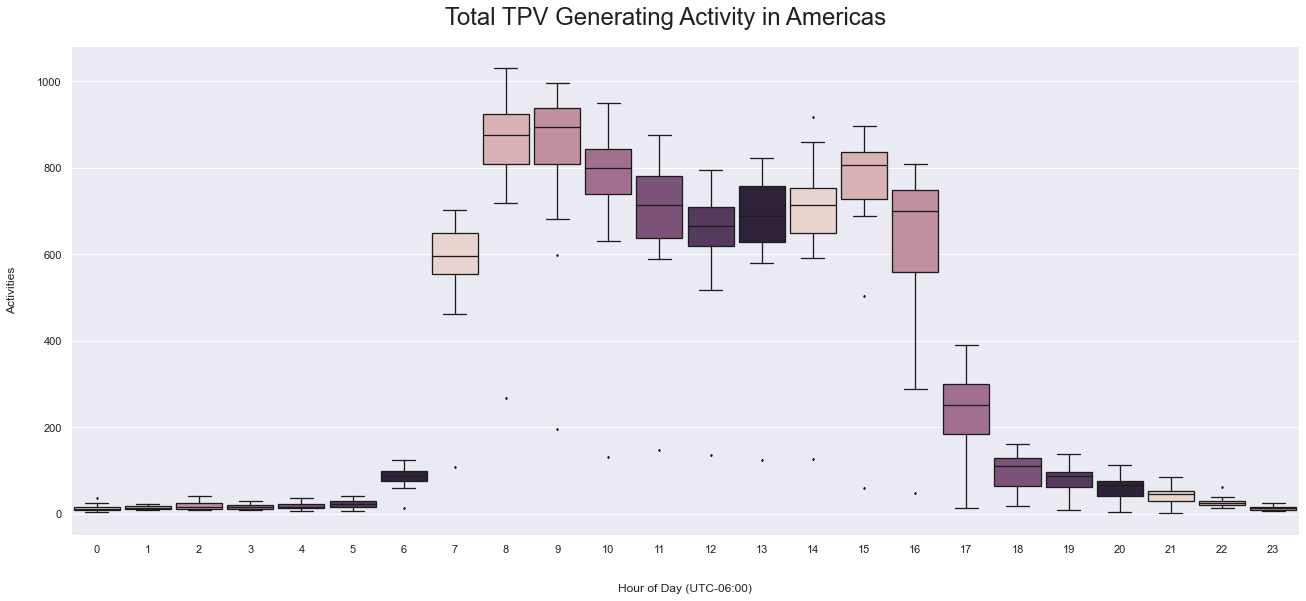

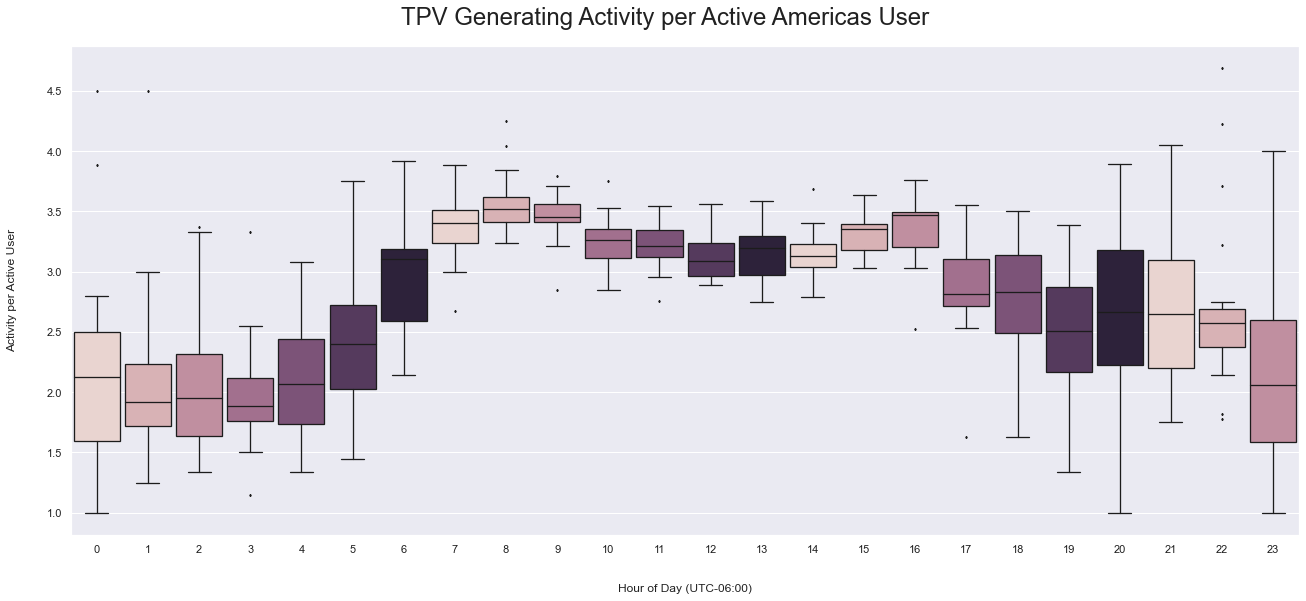

In [15]:
render_hourly_box(df_adjusted, "CREATED_BY", "Active Americas Users Doing TPV Generating Activity by Hour of Day", offset=-6, ylabel='Active Users')
render_hourly_box(df_adjusted, "ACTIVITY_COUNT", "Total TPV Generating Activity in Americas", offset=-6, ylabel='Activities')
render_hourly_box(df_adjusted, "ACTIVITY_PER_USER", "TPV Generating Activity per Active Americas User", offset=-6, ylabel='Activity per Active User')

# ACS Private Invites by Hour

In [16]:
df_population = df

# region filters
df_population = df_population.loc[df_population.PL_NAME2 == 'Americas']
df_population = df_population.loc[df_population.PL_NAME == 'Americas Private']

# activity filters
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Invited'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Invited', 'Invite Queued'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Highlights Added'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Scheduled'])]
# df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Given to Client'])]

# date filters
df_population = df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
df_population = df_population.loc[df_population.ACTIVITY_MONTH_NUMBER < 11]
df_population = df_population.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]    
df_working = shape_hourly_box(df_population)
df_working.tail()

,ACTIVITY_YEAR_NUMBER,DAY_OF_YEAR,ACTIVITY_HOUR_NUMBER,PL_NAME2,CREATED_BY,ACTIVITY_COUNT,ACTIVITY_PER_USER
317,2020,274,22,Americas,10,24,2.4
318,2020,274,23,Americas,3,6,2.0
319,2020,275,0,Americas,2,2,1.0
320,2020,275,1,Americas,2,12,6.0
321,2020,275,2,Americas,1,1,1.0


In [17]:
df_adjusted = offset_hours(df_working, -6)

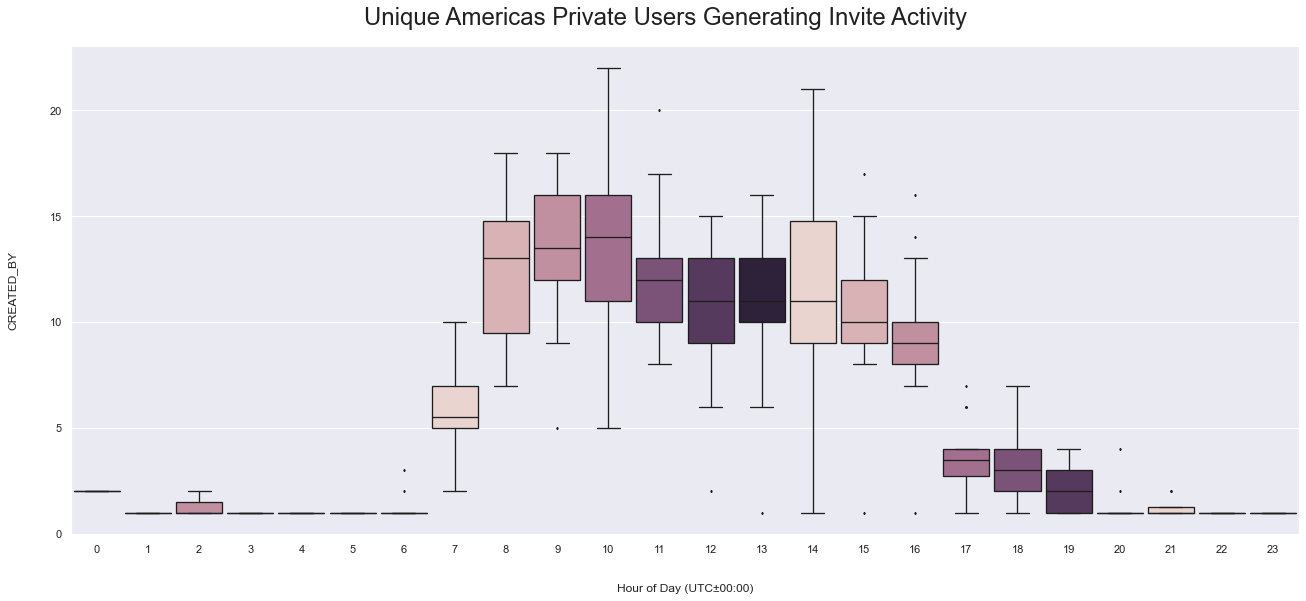

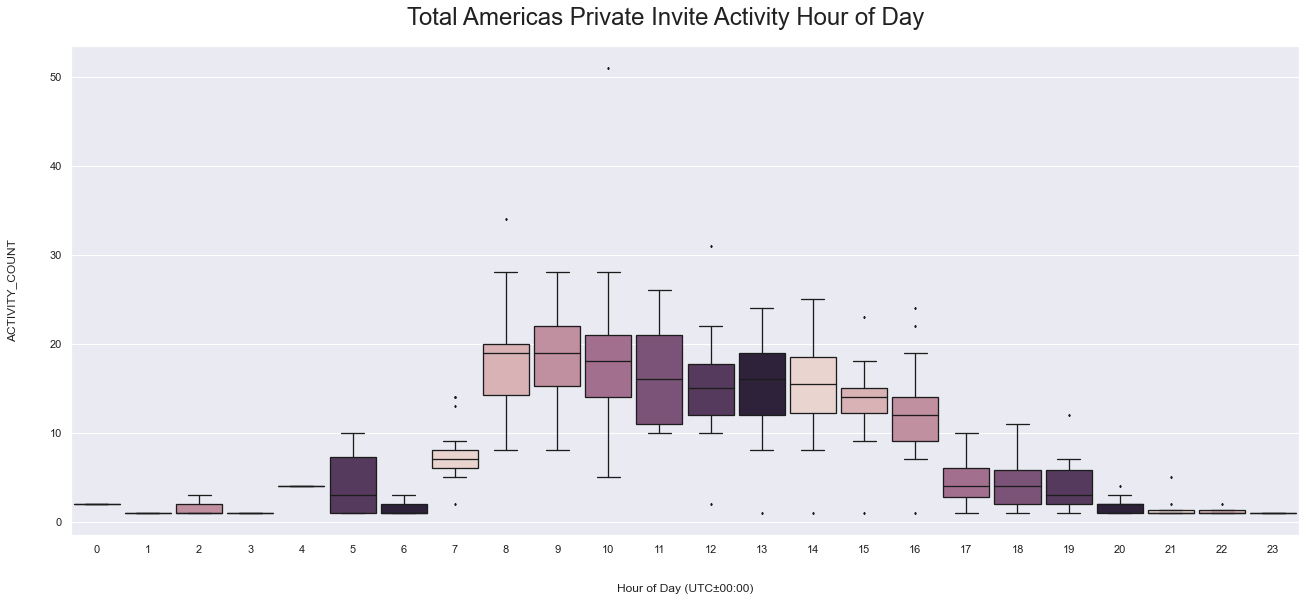

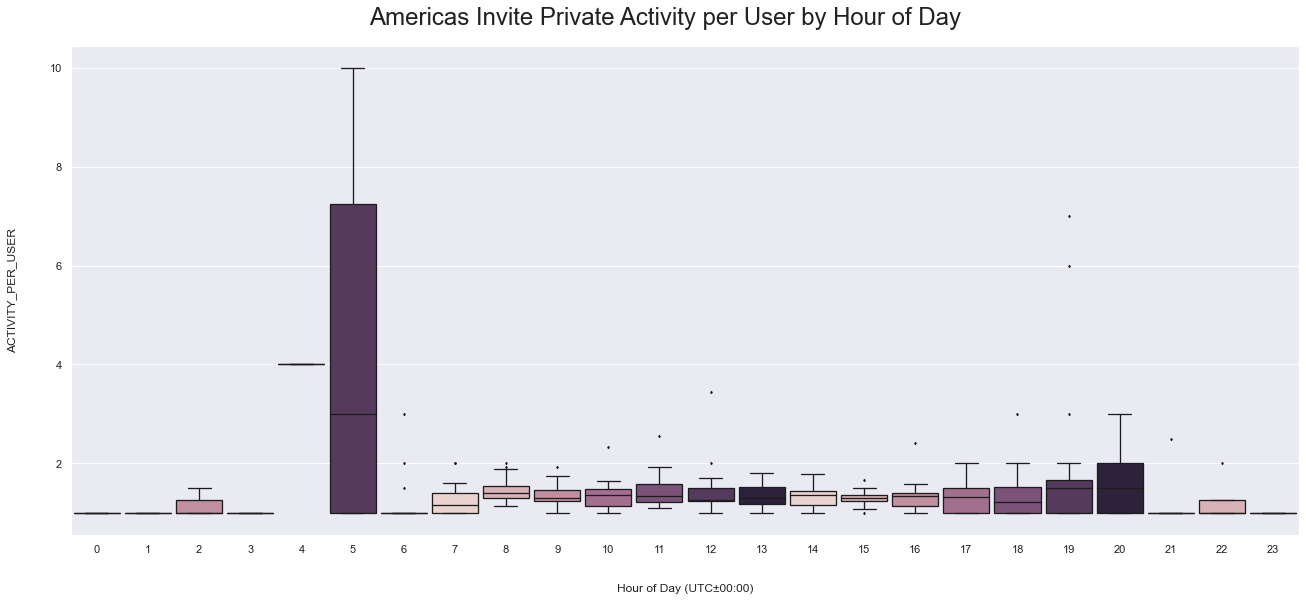

In [18]:
render_hourly_box(df_adjusted, "CREATED_BY", "Unique Americas Private Users Generating Invite Activity")
render_hourly_box(df_adjusted, "ACTIVITY_COUNT", "Total Americas Private Invite Activity Hour of Day")
render_hourly_box(df_adjusted, "ACTIVITY_PER_USER", "Americas Invite Private Activity per User by Hour of Day")

# Houry TPV Activities for Greater China

In [19]:
df_population = df

# region filters
df_population = df_population.loc[df_population.PL_NAME2 == 'Greater China']

# activity filters
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted','Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]

# date filters
df_population = df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
df_population = df_population.loc[df_population.ACTIVITY_MONTH_NUMBER < 11]
df_population = df_population.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]    

df_population = offset_hours(shape_hourly_box(df_population), 7)

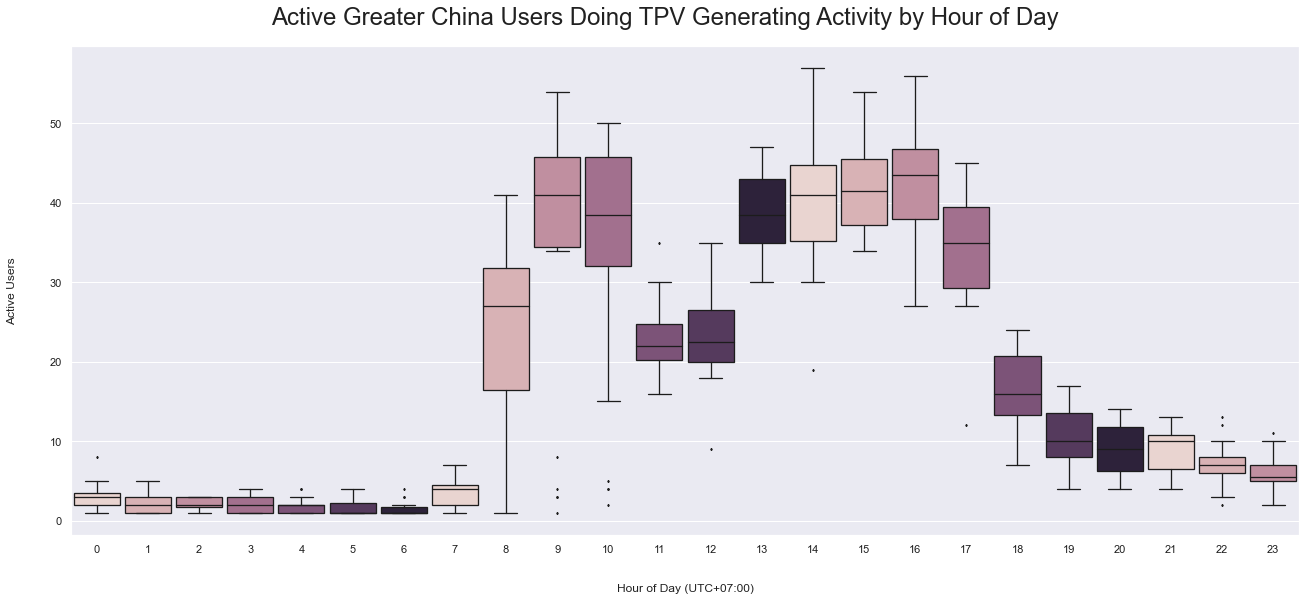

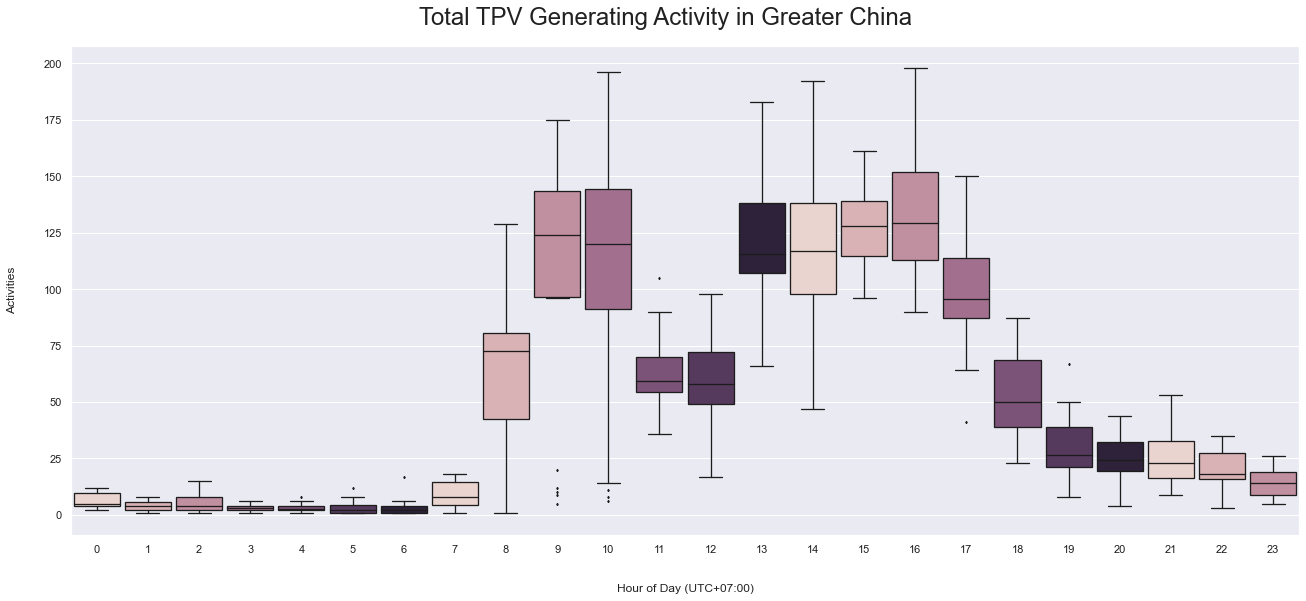

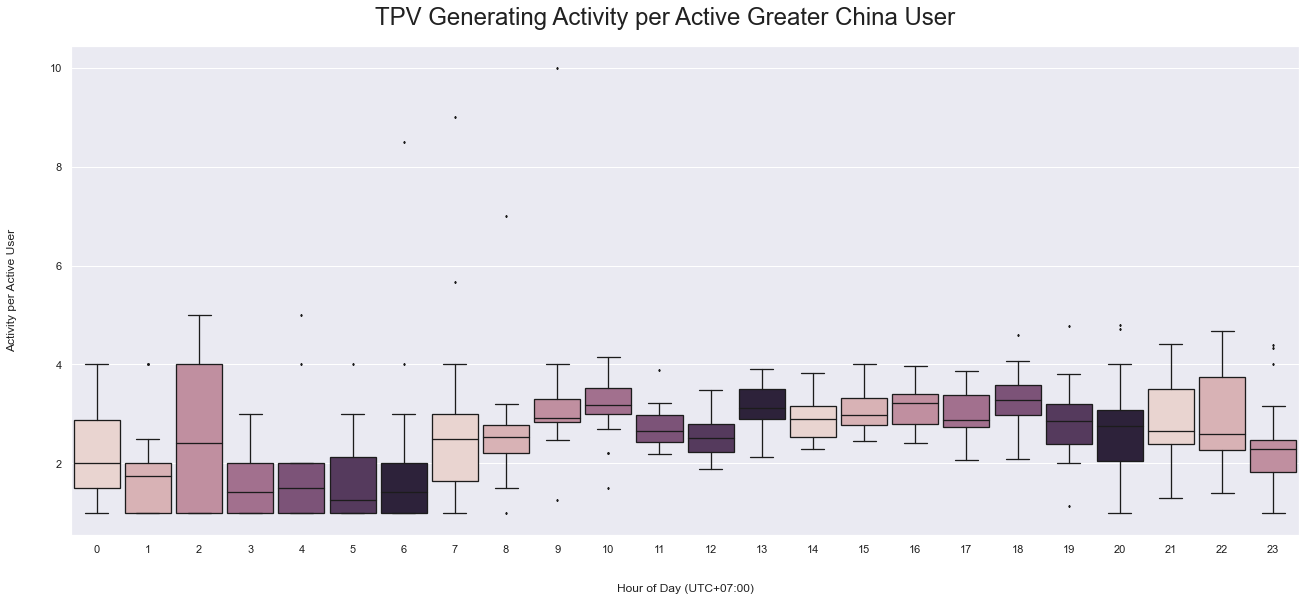

In [20]:
render_hourly_box(df_population, "CREATED_BY", "Active Greater China Users Doing TPV Generating Activity by Hour of Day", offset=7, ylabel='Active Users')
render_hourly_box(df_population, "ACTIVITY_COUNT", "Total TPV Generating Activity in Greater China", offset=7, ylabel='Activities')
render_hourly_box(df_population, "ACTIVITY_PER_USER", "TPV Generating Activity per Active Greater China User", offset=7, ylabel='Activity per Active User')

# Houry TPV Activities for EMEA

In [21]:
df_population = df.copy()

# region filters
df_population = df_population.loc[df_population.PL_NAME2 == 'EMEA']

# activity filters
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted','Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]

# date filters
df_population = df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
df_population = df_population.loc[df_population.ACTIVITY_MONTH_NUMBER < 11]
df_population = df_population.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]    
df_population.head()

df_population = shape_hourly_box(df_population)

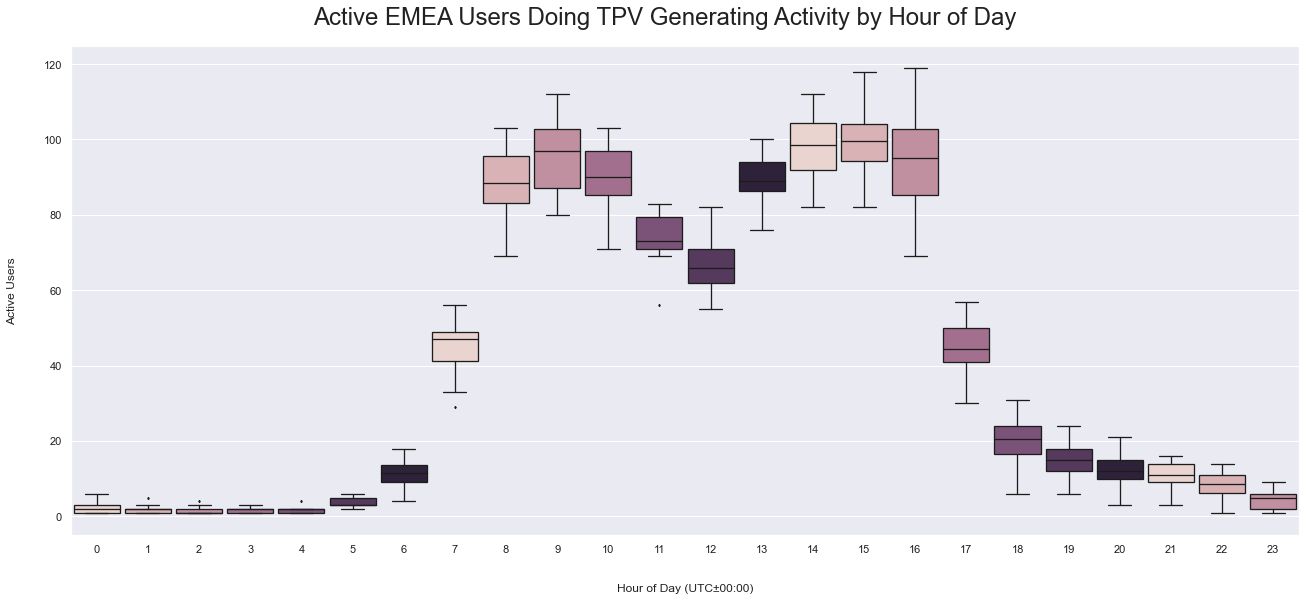

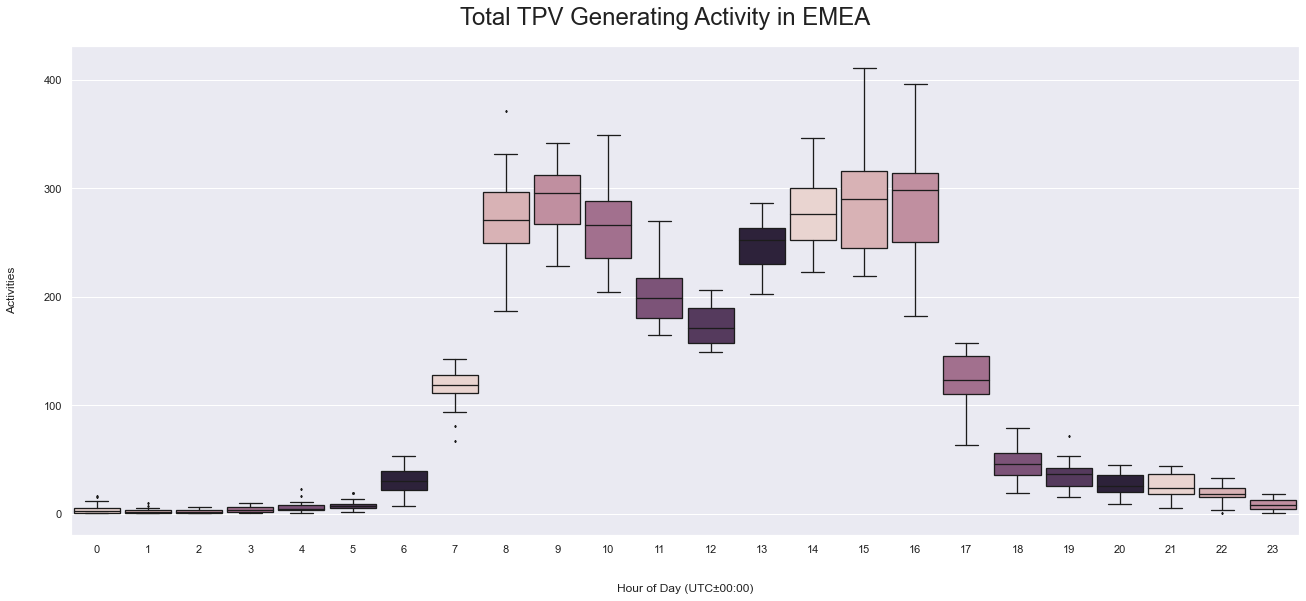

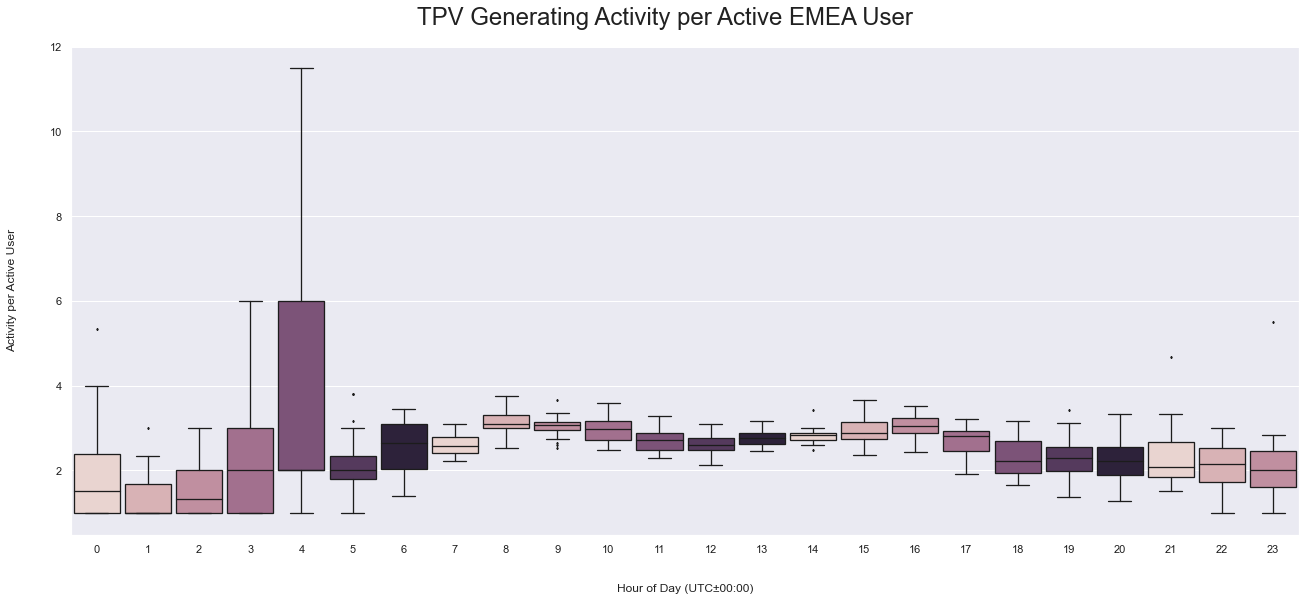

In [22]:
render_hourly_box(df_population, "CREATED_BY", "Active EMEA Users Doing TPV Generating Activity by Hour of Day", offset=0, ylabel='Active Users')
render_hourly_box(df_population, "ACTIVITY_COUNT", "Total TPV Generating Activity in EMEA", offset=0, ylabel='Activities')
render_hourly_box(df_population, "ACTIVITY_PER_USER", "TPV Generating Activity per Active EMEA User", offset=0, ylabel='Activity per Active User')

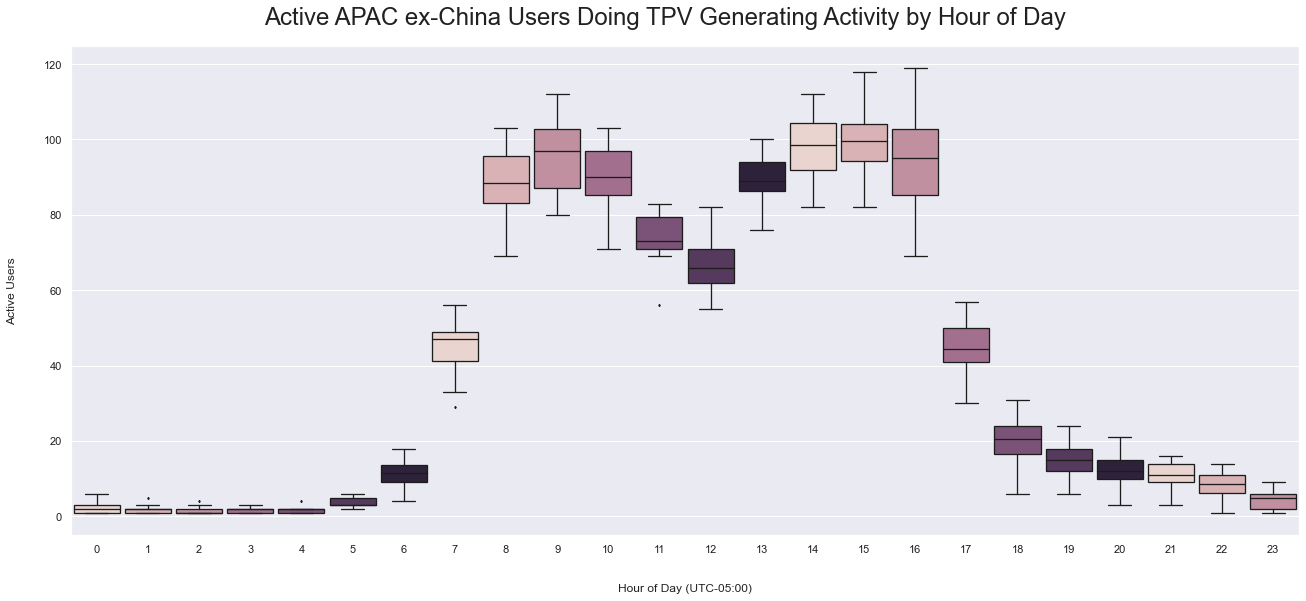

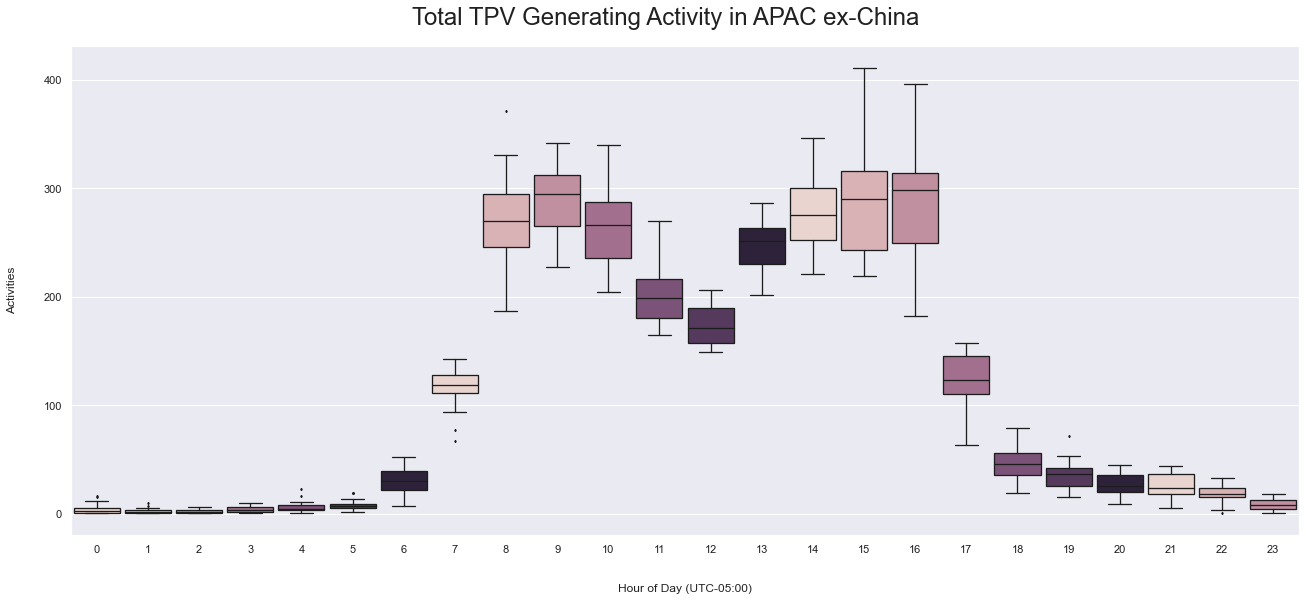

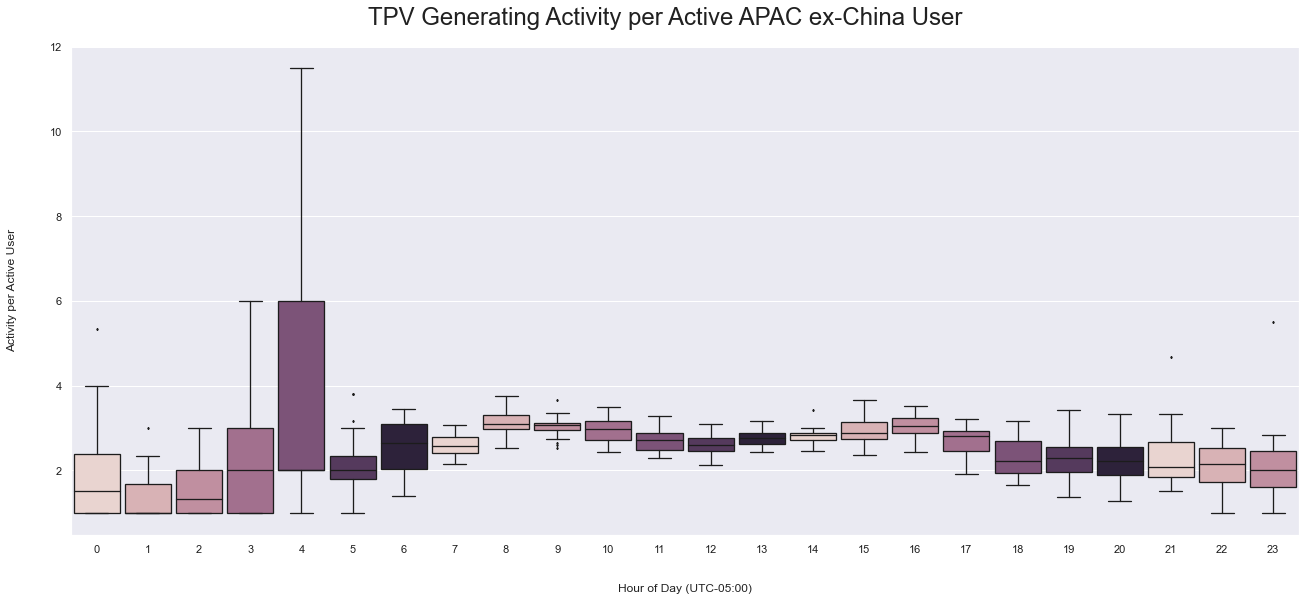

In [24]:
render_hourly_box(df_population, "CREATED_BY", "Active APAC ex-China Users Doing TPV Generating Activity by Hour of Day", offset=-5, ylabel='Active Users')
render_hourly_box(df_population, "ACTIVITY_COUNT", "Total TPV Generating Activity in APAC ex-China", offset=-5, ylabel='Activities')
render_hourly_box(df_population, "ACTIVITY_PER_USER", "TPV Generating Activity per Active APAC ex-China User", offset=-5, ylabel='Activity per Active User')

In [23]:
df_population = df
df_population= df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted', 'Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]
df_working = df.loc[~df_population.CREATED_BY.isin([0, 9999])]
df_working = df_working.loc[df_population.ACTIVITY_IS_WORK_DAY == 1]    
df_grouped = df_working.groupby(['ACTIVITY_YEAR_NUMBER', 'DAY_OF_YEAR', 'ACTIVITY_HOUR_NUMBER','PL_NAME2'])
df_working = pd.DataFrame(df_grouped['CREATED_BY'].nunique().to_frame())
df_working['ACTIVITY_COUNT'] = df_grouped['ACTIVITY_HOUR_NUMBER'].count().to_frame()['ACTIVITY_HOUR_NUMBER']
df_working = pd.DataFrame(df_working.to_records())
df_grouped = df_working.groupby(['PL_NAME2','DAY_OF_YEAR'])
df_working = df_grouped[['ACTIVITY_COUNT','CREATED_BY']].sum()
df_working = pd.DataFrame(df_working.to_records())
df_working['ACTIVITY_PER_USER'] = df_working['ACTIVITY_COUNT'] / df_working['CREATED_BY']
df_working['ACTIVITY_PER_USER_BY_ROLLING'] = df_working['ACTIVITY_PER_USER'].rolling(7).mean()
df_working.tail()

,PL_NAME2,DAY_OF_YEAR,ACTIVITY_COUNT,CREATED_BY,ACTIVITY_PER_USER,ACTIVITY_PER_USER_BY_ROLLING
102,Greater China,270,39,13,3.000000,3.059135
103,Greater China,272,946,293,3.228669,2.931088
104,Greater China,273,1153,395,2.918987,2.921498
105,Greater China,274,1014,326,3.110429,2.958654
106,Greater China,275,87,30,2.900000,2.955736


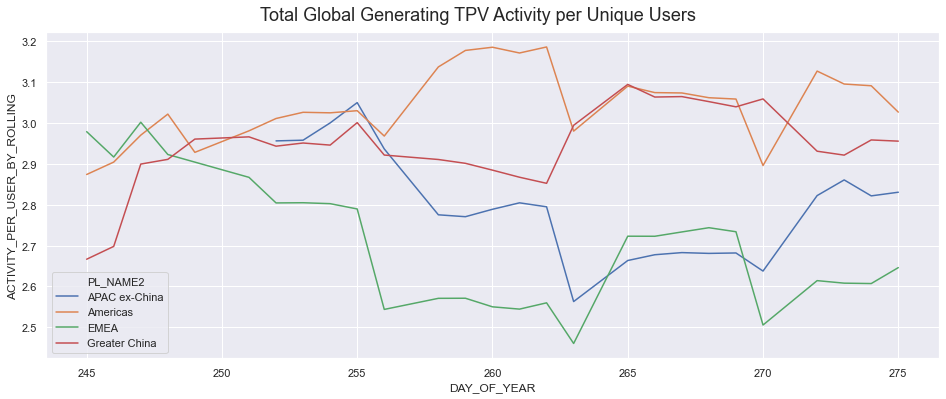

In [24]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(16, 6))
f.suptitle('Total Global Generating TPV Activity per Unique Users', fontsize="18", y=0.94)
ax = sns.lineplot(x="DAY_OF_YEAR", y="ACTIVITY_PER_USER_BY_ROLLING", hue="PL_NAME2",data=df_working,ci=None)

In [25]:
df_population = df
# date filters  
df_population= df_population.loc[df_population.ACTIVITY_YEAR_NUMBER >= 2020]


# activity filters
df_population = df_population.loc[df_population.PROJECT_ACTIVITY_STATUS.isin(['Accepted', 'Invite Queued', 'Invited', 'Highlights Added', 'Given to Client', 'Accept Started', 'Scheduled'])]
df_working = df.loc[~df_population.CREATED_BY.isin([0, 9999])]
df_working = df_working.loc[df_population.ACTIVITY_IS_WORK_DAY == 1] 

df_grouped = df_working.groupby(['ACTIVITY_YEAR_NUMBER', 'DAY_OF_YEAR', 'ACTIVITY_HOUR_NUMBER','PL_NAME2'])
df_working = pd.DataFrame(df_grouped['CREATED_BY'].nunique().to_frame())
df_working['ACTIVITY_COUNT'] = df_grouped['ACTIVITY_HOUR_NUMBER'].count().to_frame()['ACTIVITY_HOUR_NUMBER']
df_working = pd.DataFrame(df_working.to_records())
df_working['ACTIVITY_PER_USER'] = df_working['ACTIVITY_COUNT'] / df_working['CREATED_BY']
df_working['ACTIVITY_PER_USER_BY_ROLLING'] = df_working['ACTIVITY_PER_USER'].rolling(7).mean()

# region filters
conditions=[
    (df_working['PL_NAME2']=='APAC ex-China'),
    (df_working['PL_NAME2']=='Greater China'),
    (df_working['PL_NAME2']=='Americas'),
    (df_working['PL_NAME2']=='EMEA')
]

# create a list of values we want to assign for each condition
values=['91','94','326','203']

#create a new column and use np.select to assign values to it using our lists as arguments
df_working['ALL_CS']=np.select(conditions,values)
df_working['ALL_CS']=df_working['ALL_CS'].astype(str).astype(int)
df_working['Created_by_Perc']=df_working['ACTIVITY_PER_USER_BY_ROLLING']/df_working['ALL_CS']

#display updated DataFrame
df_working.tail()

,ACTIVITY_YEAR_NUMBER,DAY_OF_YEAR,ACTIVITY_HOUR_NUMBER,PL_NAME2,CREATED_BY,ACTIVITY_COUNT,ACTIVITY_PER_USER,ACTIVITY_PER_USER_BY_ROLLING,ALL_CS,Created_by_Perc
2034,2020,275,2,Greater China,8,20,2.500000,2.469509,94,0.026271
2035,2020,275,3,APAC ex-China,36,104,2.888889,2.459588,91,0.027028
2036,2020,275,3,Americas,14,31,2.214286,2.296323,326,0.007044
2037,2020,275,3,EMEA,3,5,1.666667,2.391561,203,0.011781
2038,2020,275,3,Greater China,15,53,3.533333,2.639180,94,0.028076


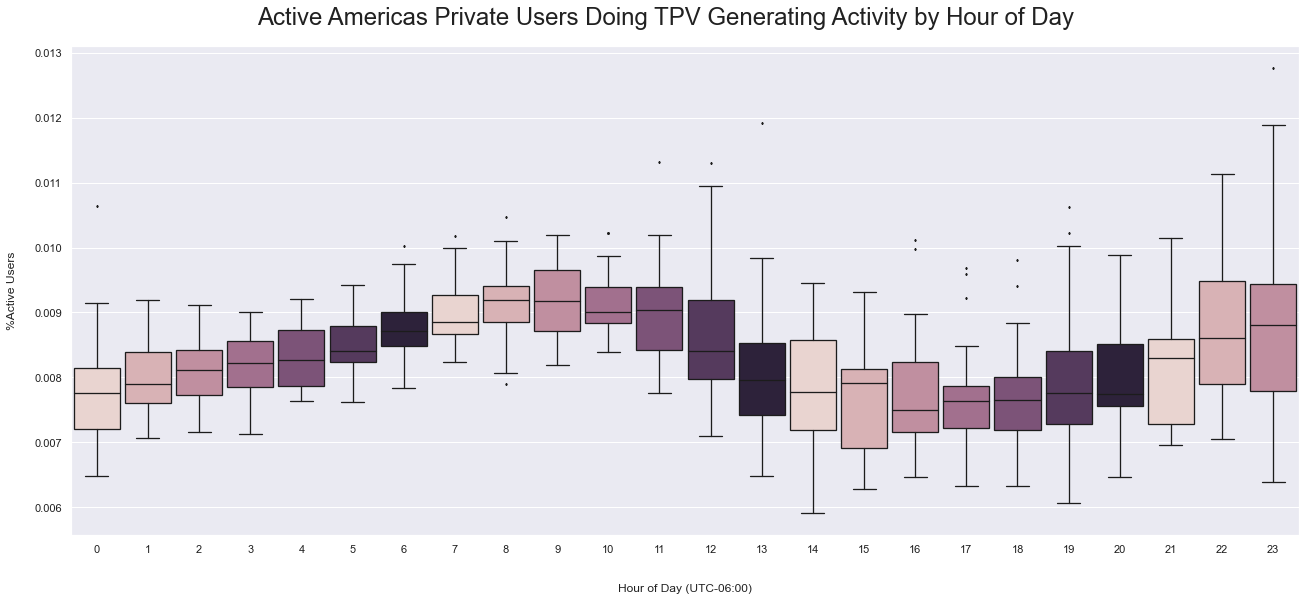

In [26]:
df_population = offset_hours(df_working, -6)
df_population = df_population.loc[df_population.PL_NAME2 == 'Americas']
render_hourly_box(df_population, "Created_by_Perc", "Active Americas Private Users Doing TPV Generating Activity by Hour of Day", offset=-6, ylabel='%Active Users')

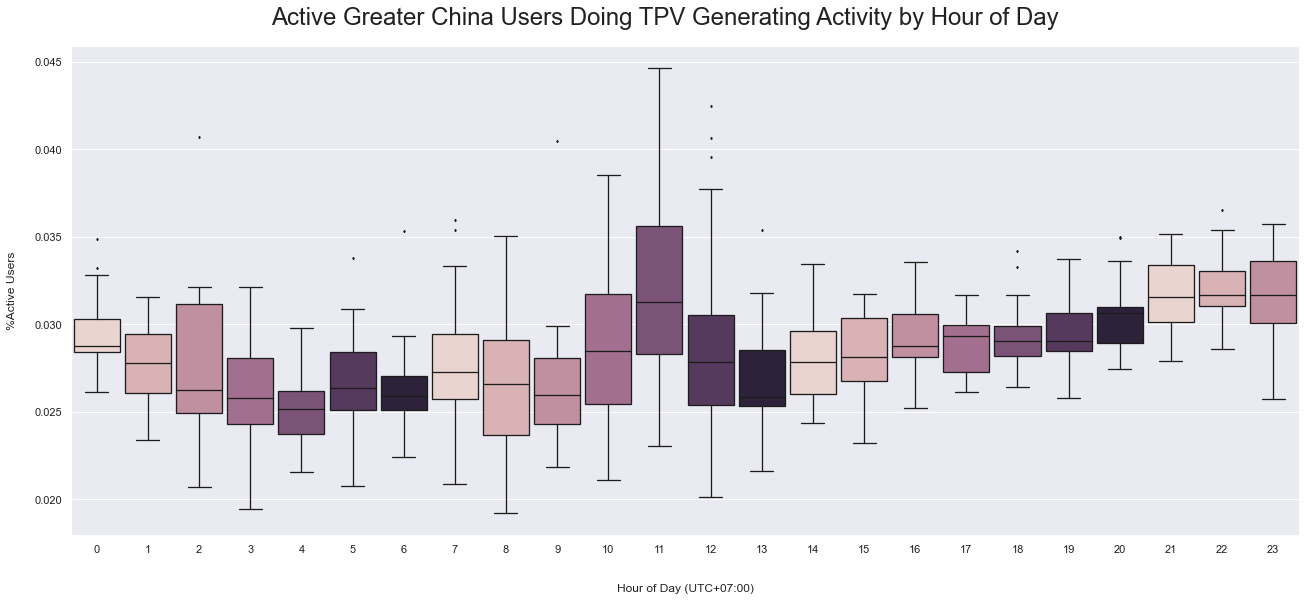

In [27]:
df_population = offset_hours(df_working, 7)
df_population = df_population.loc[df_population.PL_NAME2 == 'Greater China']
render_hourly_box(df_population, "Created_by_Perc", "Active Greater China Users Doing TPV Generating Activity by Hour of Day", offset=7, ylabel='%Active Users')

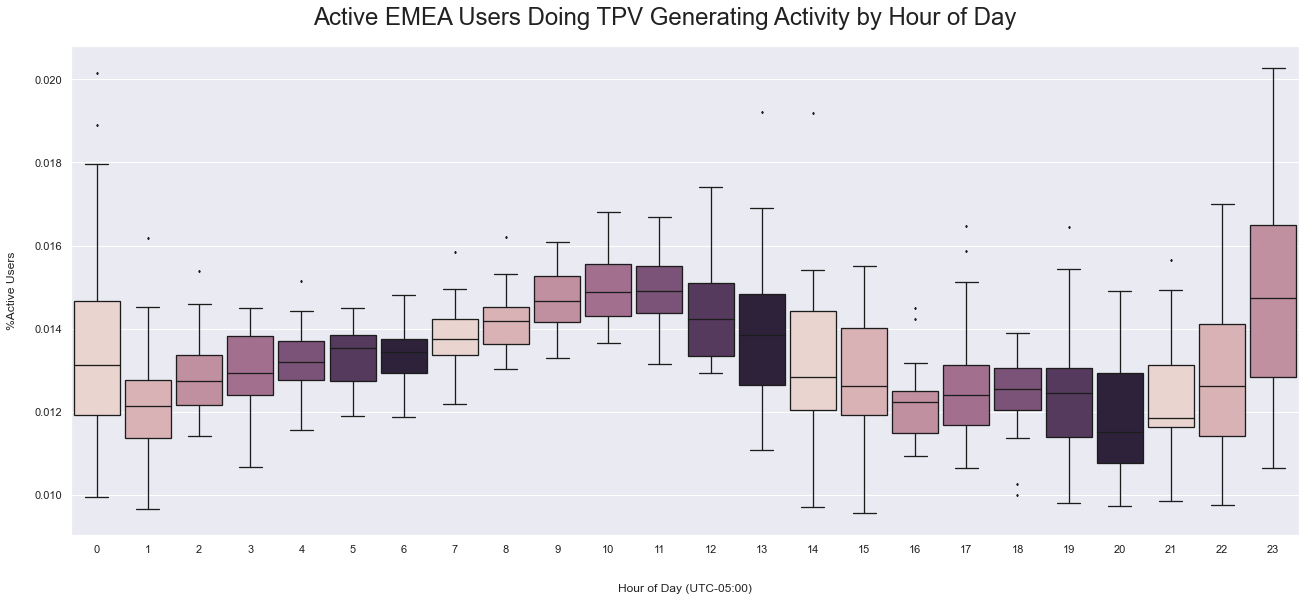

In [28]:
df_population = offset_hours(df_working, -5)
df_population = df_population.loc[df_population.PL_NAME2 == 'EMEA']
render_hourly_box(df_population, "Created_by_Perc", "Active EMEA Users Doing TPV Generating Activity by Hour of Day", offset=-5, ylabel='%Active Users')